In [1]:
import tensorflow as tf

In [2]:
help(tf)

Help on package tensorflow:

NAME
    tensorflow - TensorFlow root package

PACKAGE CONTENTS


DATA
    __compiler_version__ = 'MSVC 190024234'
    __cxx11_abi_flag__ = 0
    __git_version__ = 'unknown'
    __monolithic_build__ = 1
    bfloat16 = tf.bfloat16
    bool = tf.bool
    complex128 = tf.complex128
    complex64 = tf.complex64
    double = tf.float64
    float16 = tf.float16
    float32 = tf.float32
    float64 = tf.float64
    half = tf.float16
    int16 = tf.int16
    int32 = tf.int32
    int64 = tf.int64
    int8 = tf.int8
    newaxis = None
    qint16 = tf.qint16
    qint32 = tf.qint32
    qint8 = tf.qint8
    quint16 = tf.quint16
    quint8 = tf.quint8
    resource = tf.resource
    string = tf.string
    uint16 = tf.uint16
    uint32 = tf.uint32
    uint64 = tf.uint64
    uint8 = tf.uint8
    variant = tf.variant

VERSION
    2.0.0

FILE
    c:\users\lmann\.conda\envs\dlenv\lib\site-packages\tensorflow\__init__.py




In [8]:
%matplotlib inline
from IPython import display
import numpy as np

In [9]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [10]:
f(2)

4

In [11]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [13]:
numerical_lim(f, 2, 0.0001)

8.000300000023941

In [14]:
numerical_lim(f, 2, -0.0001)

7.999700000000942

In [15]:
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [16]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [27]:
from matplotlib import pyplot as plt

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

In [28]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [52]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

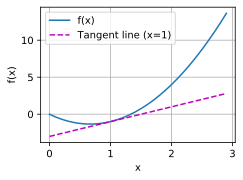

In [53]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [45]:
def ln(x):
    return np.log(x)

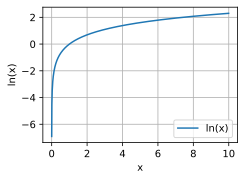

In [54]:
x = np.arange(0.001, 10, 0.01)
plot(x, [ln(x)], 'x', 'ln(x)', legend=['ln(x)'])

In [57]:
def exp(x):
    return np.exp(x)

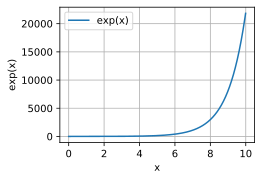

In [58]:
plot(x, [exp(x)], 'x', 'exp(x)', legend=['exp(x)'])

In [61]:
def g(x):
    return x*x*x - (1/x)

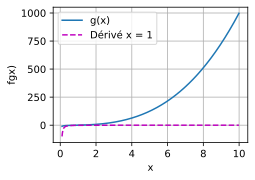

In [68]:
x = np.arange(0.1, 10, 0.01)
plot(x, [g(x), -1/(x*x)], 'x', 'fgx)', legend=['g(x)', 'Dérivé x = 1'])

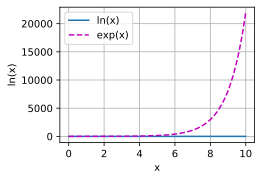

In [71]:
x = np.arange(0.001, 10, 0.01)
plot(x, [ln(x), exp(x)], 'x', 'ln(x)', legend=['ln(x)', 'exp(x)'])

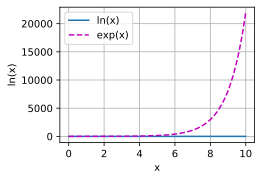

In [73]:
plot(x, [ln(x), exp(x)], 'x', 'ln(x)', legend=['ln(x)', 'exp(x)'])

In [74]:
def f2(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

In [75]:
a = tf.range(10, dtype=tf.float32)

In [76]:
f2(a)

<tf.Tensor: id=53, shape=(10,), dtype=float32, numpy=
array([  0.,  64., 128., 192., 256., 320., 384., 448., 512., 576.],
      dtype=float32)>

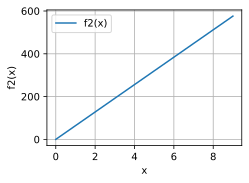

In [77]:
plot(a, [f2(a)], 'x', 'f2(x)', legend=['f2(x)'])